In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
sales_data = pd.read_csv('./sales_train.csv')  # 일일 판매데이터
item_cate = pd.read_csv('./item_categories.csv')  # 항목 카테고리
items = pd.read_csv('./items.csv') # 항목, 제품명
shops = pd.read_csv('./shops.csv') # 상점명, 상점번호
sample_sub = pd.read_csv('./sample_submission.csv') # 샘플 제출 파일
test_data = pd.read_csv('./test.csv') # 예측 할 데이터

In [3]:
sales_data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
sales_data.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


In [5]:
sales_data.shape

(2935849, 6)

In [6]:
# 판매데이터 정보
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [7]:
# 날짜 표기 수정 후 정렬
sales_data["date"]= pd.to_datetime(sales_data["date"], format='%d.%m.%Y')
sales_data.sort_values(by="date", ascending=True, inplace=True)
print(sales_data)

              date  date_block_num  shop_id  item_id  item_price  item_cnt_day
49800   2013-01-01               0       18     5823      2500.0           1.0
29784   2013-01-01               0       27     5573       849.0           1.0
35476   2013-01-01               0        7     1006       399.0           1.0
8330    2013-01-01               0       19    17707       899.0           1.0
57384   2013-01-01               0       14    19548       149.0           1.0
...            ...             ...      ...      ...         ...           ...
2885098 2015-10-31              33       41    21386       169.0           1.0
2930981 2015-10-31              33       21      988       199.0           1.0
2885097 2015-10-31              33       41    21377       169.0           1.0
2930993 2015-10-31              33       22    10207      1199.0           1.0
2928850 2015-10-31              33       24     3042      3199.0           1.0

[2935849 rows x 6 columns]


In [8]:
# 요약통계
sales_data.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [11]:
sales_data.item_cnt_day.unique()

array([ 1.000e+00,  2.000e+00, -1.000e+00,  3.000e+00,  6.000e+00,
        4.000e+00,  8.000e+00,  2.600e+01,  7.000e+00,  5.000e+00,
        1.000e+01,  1.100e+01,  9.000e+00,  6.400e+01,  1.700e+01,
        1.400e+01,  2.900e+01,  1.200e+01,  1.500e+01, -2.000e+00,
        1.800e+01,  1.300e+01, -5.000e+00,  2.200e+01,  2.100e+01,
        2.700e+01,  2.000e+01, -6.000e+00, -3.000e+00,  3.900e+01,
        1.600e+01,  1.900e+01,  3.000e+01,  2.500e+01,  2.300e+01,
        2.400e+01,  5.300e+01,  4.000e+01,  2.800e+01,  3.100e+01,
        3.600e+01, -4.000e+00,  4.400e+01,  5.200e+01,  3.200e+01,
        3.500e+01,  3.800e+01,  3.700e+01,  5.600e+01,  5.700e+01,
        8.800e+01,  4.100e+01,  6.900e+01,  3.400e+01,  4.800e+01,
        5.000e+01,  4.700e+01,  3.300e+01,  8.000e+01,  4.200e+01,
        6.100e+01,  1.000e+02,  8.200e+01,  2.000e+02,  7.600e+01,
        7.700e+01,  1.070e+02,  7.000e+01,  6.000e+01,  4.600e+01,
        4.900e+01,  5.500e+01,  4.500e+01,  8.500e+01,  1.500e

In [12]:
sales_data.item_cnt_day.max()

2169.0

In [13]:
sales_data.item_cnt_day.min()

-22.0

In [15]:
sales_data["Year"] = sales_data["date"].dt.year
sales_data["Month"] = sales_data["date"].dt.month

In [16]:
# strftime >> date object를 문자열로 변환  %b는 축약된 영문자 월로 표기
sales_data['Month']=[d.strftime('%b') for d in sales_data.date]
print(sales_data)

              date  date_block_num  shop_id  item_id  item_price  \
49800   2013-01-01               0       18     5823      2500.0   
29784   2013-01-01               0       27     5573       849.0   
35476   2013-01-01               0        7     1006       399.0   
8330    2013-01-01               0       19    17707       899.0   
57384   2013-01-01               0       14    19548       149.0   
...            ...             ...      ...      ...         ...   
2885098 2015-10-31              33       41    21386       169.0   
2930981 2015-10-31              33       21      988       199.0   
2885097 2015-10-31              33       41    21377       169.0   
2930993 2015-10-31              33       22    10207      1199.0   
2928850 2015-10-31              33       24     3042      3199.0   

         item_cnt_day  Year Month  
49800             1.0  2013   Jan  
29784             1.0  2013   Jan  
35476             1.0  2013   Jan  
8330              1.0  2013   Jan  
573

In [17]:
# 일일 판매 금액
sales_data['Sales_per_item'] = sales_data['item_cnt_day'] * sales_data['item_price']
print(sales_data)

              date  date_block_num  shop_id  item_id  item_price  \
49800   2013-01-01               0       18     5823      2500.0   
29784   2013-01-01               0       27     5573       849.0   
35476   2013-01-01               0        7     1006       399.0   
8330    2013-01-01               0       19    17707       899.0   
57384   2013-01-01               0       14    19548       149.0   
...            ...             ...      ...      ...         ...   
2885098 2015-10-31              33       41    21386       169.0   
2930981 2015-10-31              33       21      988       199.0   
2885097 2015-10-31              33       41    21377       169.0   
2930993 2015-10-31              33       22    10207      1199.0   
2928850 2015-10-31              33       24     3042      3199.0   

         item_cnt_day  Year Month  Sales_per_item  
49800             1.0  2013   Jan          2500.0  
29784             1.0  2013   Jan           849.0  
35476             1.0  2013

In [19]:
sales_data['item_category_id']=item_cate['item_category_id']
sales_data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,Year,Month,Sales_per_item,item_category_id
49800,2013-01-01,0,18,5823,2500.0,1.0,2013,Jan,2500.0,NaN
29784,2013-01-01,0,27,5573,849.0,1.0,2013,Jan,849.0,NaN
35476,2013-01-01,0,7,1006,399.0,1.0,2013,Jan,399.0,NaN
8330,2013-01-01,0,19,17707,899.0,1.0,2013,Jan,899.0,NaN
57384,2013-01-01,0,14,19548,149.0,1.0,2013,Jan,149.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2885098,2015-10-31,33,41,21386,169.0,1.0,2015,Oct,169.0,NaN
2930981,2015-10-31,33,21,988,199.0,1.0,2015,Oct,199.0,NaN
2885097,2015-10-31,33,41,21377,169.0,1.0,2015,Oct,169.0,NaN
2930993,2015-10-31,33,22,10207,1199.0,1.0,2015,Oct,1199.0,NaN


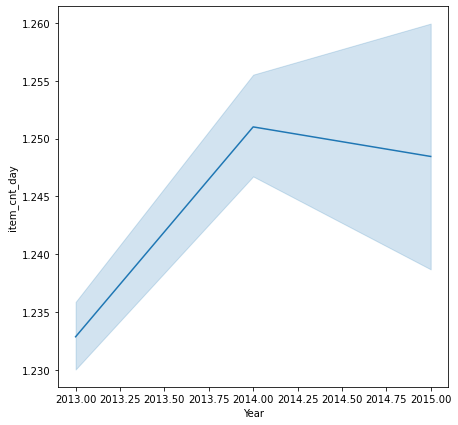

In [20]:
#연도별 판매량
fig,axes = plt.subplots(1,1,figsize=(7,7))
sns.lineplot(x=sales_data['Year'],y=sales_data['item_cnt_day'])
plt.show()

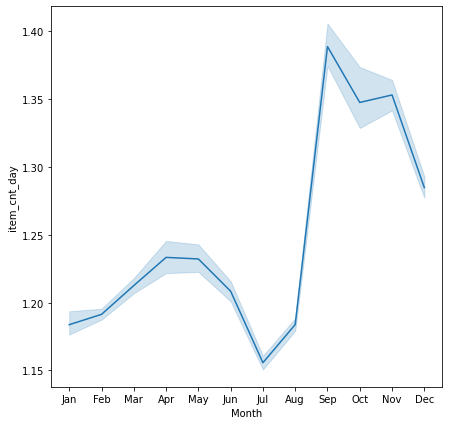

In [21]:
# 월별 판매량
fig,axes = plt.subplots(1,1,figsize=(7,7))
sns.lineplot(x=sales_data['Month'],y=sales_data['item_cnt_day'])
plt.show()

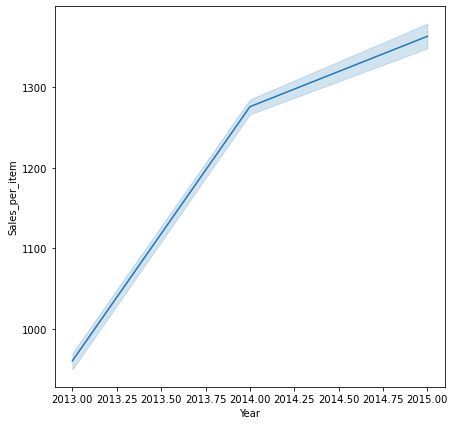

In [22]:
# 연도별 판매총액 >> 14년 까진 꾸준하다가 14년부터 판매량 감소
fig,axes = plt.subplots(1,1,figsize=(7,7))
sns.lineplot(x=sales_data['Year'],y=sales_data['Sales_per_item'])
plt.show()

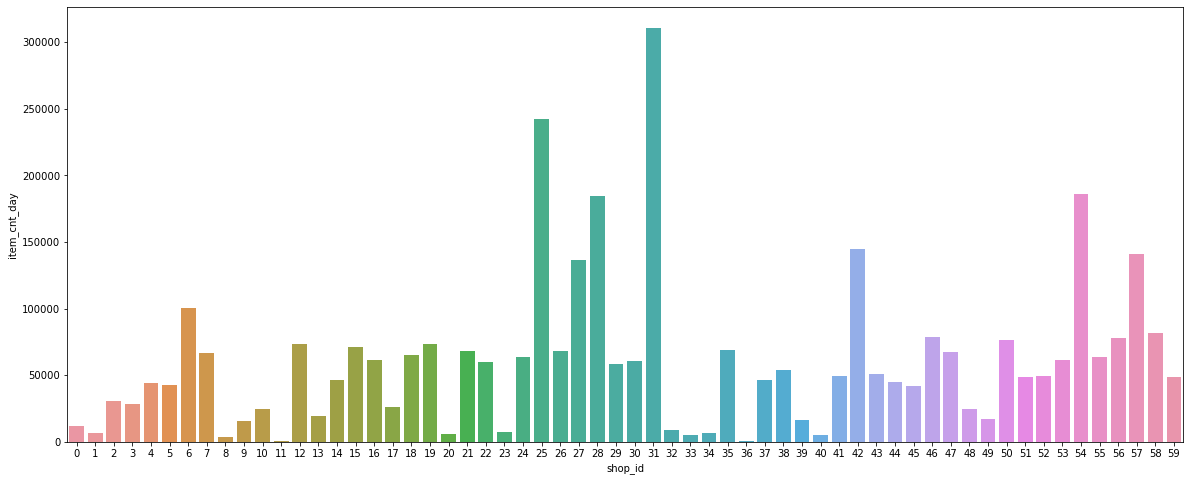

In [23]:
# 상점별 판매량
shop_sum=sales_data.groupby(['shop_id'], as_index=False)['item_cnt_day'].sum()
fig, axes = plt.subplots(1,1,figsize = (20, 8))
sns.barplot(x="shop_id",y="item_cnt_day", data=shop_sum)
plt.show()

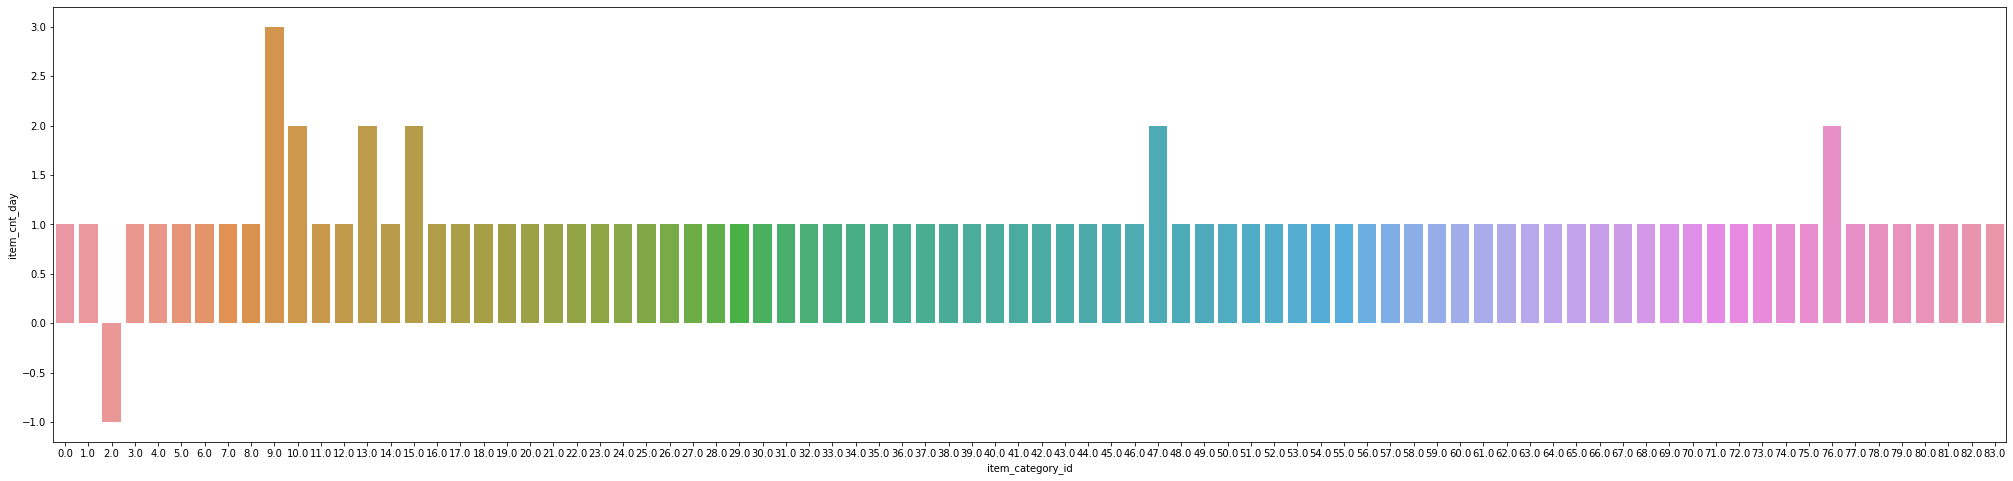

In [24]:
# 품목별 판매량
Category_sum=sales_data.groupby(['item_category_id'], as_index=False)['item_cnt_day'].sum()
fig, axes = plt.subplots(1,1,figsize = (35,8))
sns.barplot(x="item_category_id",y="item_cnt_day", data=Category_sum)
plt.show()

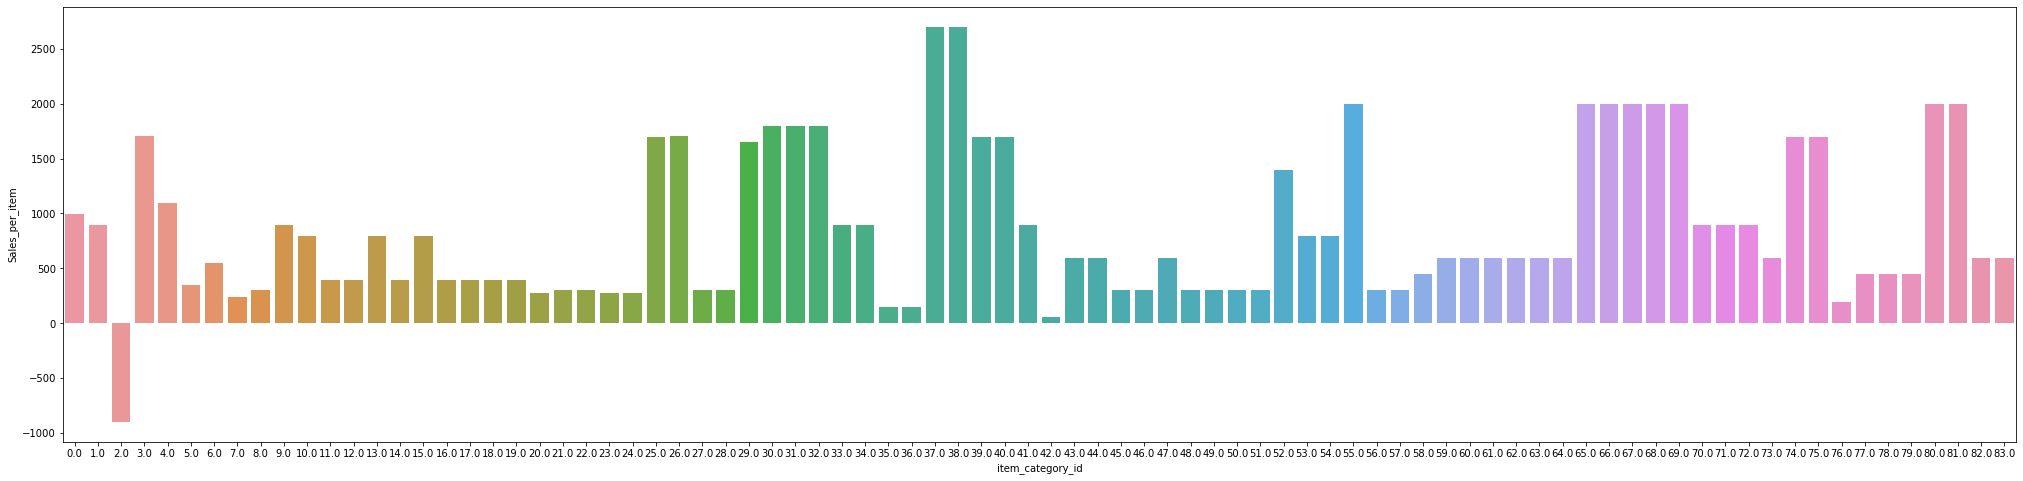

In [25]:
# 카테고리별 판매금액
Category_sum=sales_data.groupby(['item_category_id'], as_index=False)['Sales_per_item'].sum()
fig, axes = plt.subplots(1,1,figsize = (35,8))
sns.barplot(x="item_category_id",y="Sales_per_item", data=Category_sum)
plt.show()

In [26]:

sales_data_tmp=sales_data[['date_block_num','shop_id','item_cnt_day']]
dt = pd.pivot_table(index='date_block_num',data=sales_data_tmp,columns='shop_id', aggfunc='sum')
dt = dt.item_cnt_day
dt.columns.name = 'No. of Shops'
dt.index.name='No. of Months'
dt.fillna(0, inplace=True)
dt

No. of Shops,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
No. of Months,,,,,,,,,,,,,,,,,,,,,
0,5578.0,2947.0,1146.0,767.0,2114.0,0.0,3686.0,2495.0,1463.0,0.0,...,3406.0,2748.0,1812.0,2055.0,9386.0,0.0,3238.0,0.0,0.0,2017.0
1,6127.0,3364.0,488.0,798.0,2025.0,877.0,4007.0,2513.0,1156.0,0.0,...,3054.0,2284.0,1737.0,1906.0,8075.0,0.0,2655.0,0.0,0.0,1897.0
2,0.0,0.0,753.0,959.0,2060.0,1355.0,4519.0,2460.0,977.0,0.0,...,3610.0,2605.0,2034.0,2365.0,9488.0,0.0,3099.0,6586.0,3773.0,2028.0
3,0.0,0.0,583.0,647.0,285.0,1008.0,3168.0,1540.0,-1.0,0.0,...,2740.0,1945.0,1446.0,1515.0,6726.0,0.0,2153.0,5493.0,2831.0,1388.0
4,0.0,0.0,553.0,710.0,1211.0,1110.0,3022.0,1647.0,0.0,0.0,...,2839.0,2243.0,1482.0,1767.0,7006.0,852.0,2140.0,5233.0,2308.0,1374.0
5,0.0,0.0,832.0,784.0,1464.0,1393.0,3847.0,2085.0,0.0,0.0,...,3761.0,2200.0,1815.0,2125.0,8101.0,728.0,3105.0,5987.0,2972.0,1707.0
6,0.0,0.0,807.0,721.0,1378.0,1265.0,3360.0,2031.0,0.0,0.0,...,3235.0,2273.0,1616.0,1975.0,7225.0,795.0,3294.0,5827.0,3122.0,1747.0
7,0.0,0.0,875.0,890.0,1713.0,1510.0,3702.0,2397.0,0.0,0.0,...,3718.0,2142.0,1772.0,2367.0,7792.0,719.0,3311.0,5413.0,2863.0,2048.0
8,0.0,0.0,945.0,1026.0,1536.0,1298.0,4208.0,2599.0,0.0,0.0,...,3655.0,1903.0,2125.0,2440.0,7827.0,812.0,2829.0,5213.0,2735.0,2008.0


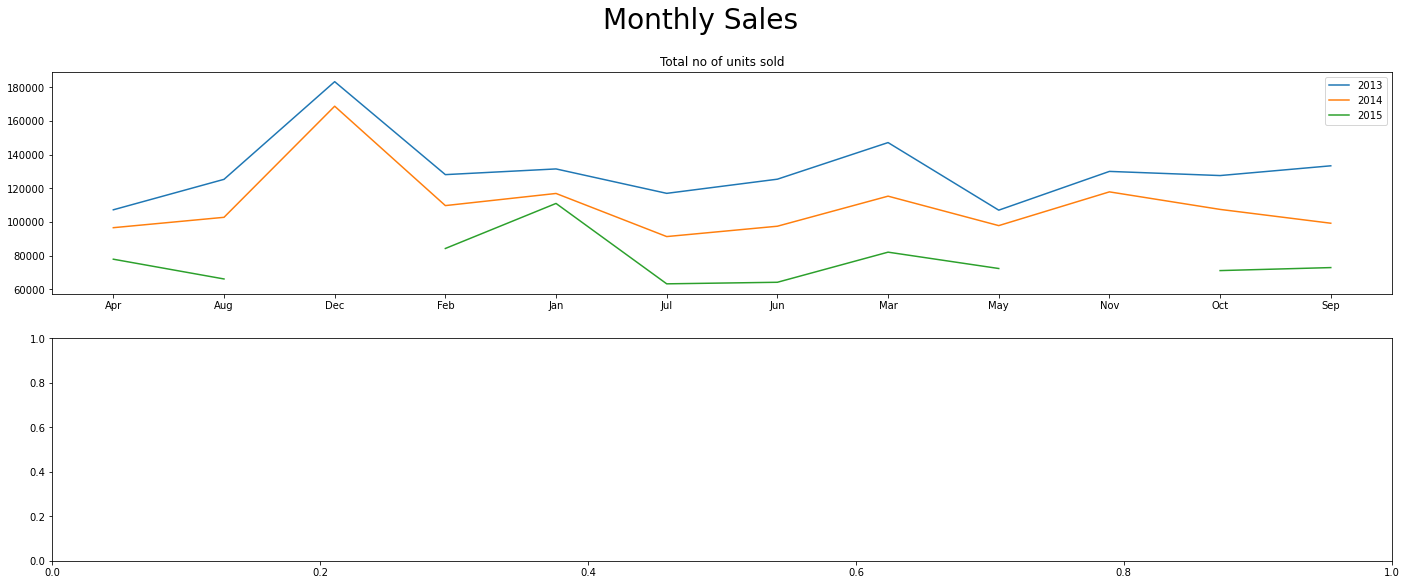

<Figure size 432x288 with 0 Axes>

In [29]:
fig,axes = plt.subplots(2,1,figsize=(24,9))


sales_data_tmp = sales_data[['Year','Month','item_cnt_day']].pivot_table(index=['Month'],columns=['Year'],aggfunc={"item_cnt_day":np.sum})
axes[0].plot(sales_data_tmp)
axes[0].set_title('Total no of units sold')
axes[0].legend(labels=[i[1] for i in sales_data_tmp.columns])
plt.suptitle('Monthly Sales',fontsize="28")
plt.show()

sales_data_tmp = sales_data[['Year','Month','Sales_per_item']].pivot_table(index=['Month'],columns=['Year'],aggfunc={"Sales_per_item":np.sum})
axes[0].plot(sales_data_tmp)
axes[0].set_title('Total Sales')
axes[0].legend(labels=[i[1] for i in sales_data_tmp.columns])
plt.suptitle('Monthly Sales',fontsize="28")
plt.show()